In [5]:
#First we are going to load in the needed programs
import numpy as np
import pickle 
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
from scipy import signal
from scipy import stats
from scipy.stats import norm, gaussian_kde
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
import seaborn as sns
import dill #This will be used to store the workplace so you dont have to run certain cells
sns.set()
import os 
from math import nan
import math 
import ast
from numpy import mean


from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.neighbors import KernelDensity
from scipy.misc import derivative


<h2> Quantify correlations as functions of various variables </h2> 

<h3> Correlations a function of the genomic distance and median distance </h3> 

In [3]:
from scipy import stats

Value=[];
Value_2=[];
Value_3=[];

data = {'Median Distance ($\mu$m)': [], 'Genomic Distance (Mb)': [], 'Spear': []}
df= pd.DataFrame.from_dict(data)


file = "Single_Median/Median"
ff=pd.read_csv(file)

ff=ff.values


for barcode1 in range(0,651):
    clear_output(wait=True)
    print(barcode1)
    
    file='Transcription_Trajectories/Test'+str(barcode1)+'.npy'
    trans=np.load(file)
    
    if np.nansum(trans)>0:
        
        for barcode2 in range(0,651):
            
            file='Transcription_Trajectories/Test'+str(barcode2)+'.npy'
            trans2=np.load(file)
            
            if np.nansum(trans2)>0 and np.abs(barcode1-barcode2)>0:
                    
                        transtemp1=np.copy(trans)
                        transtemp2=np.copy(trans2)
                    
                        Value.append(stats.spearmanr(transtemp1,  transtemp2)[0])
                        Value_2.append(ff[barcode1, barcode2])
                        Value_3.append(np.abs(barcode1-barcode2))
                        vv1=str(np.floor(ff[barcode1, barcode2]/200)*200+100)
                        df.loc[len(df.index)] = [(np.floor(ff[barcode1, barcode2]/200)*200+100)/1000, np.floor(np.abs((barcode1-barcode2)*50/1000))+.5, stats.spearmanr(transtemp1,  transtemp2)[0]]
                    
                
                
                

650


<h3> Make figure </h3> 

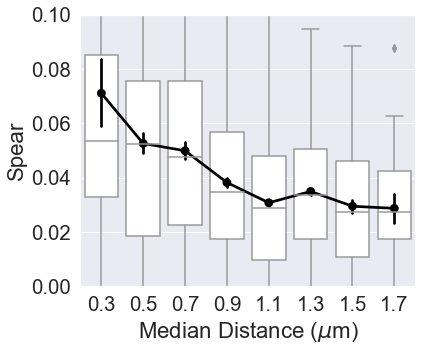

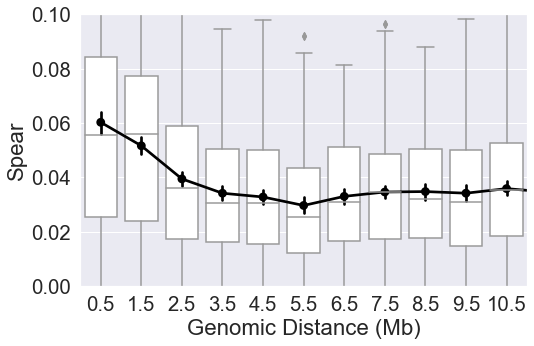

In [6]:
sns.set(font_scale=1.85)
fig=plt.figure()
ax = sns.boxplot(x='Median Distance ($\mu$m)', y='Spear',
                    data=df, color='white')

ax=sns.pointplot(x='Median Distance ($\mu$m)', y='Spear',
                    data=df, estimator=mean,color='black')

fig.set_size_inches(6,5)

plt.ylim(0,.1)
fig.savefig("Figures/"+"Median_Distance.png", dpi=300, bbox_inches='tight')

sns.set(font_scale=1.85)
fig=plt.figure()
ax = sns.boxplot(x='Genomic Distance (Mb)', y='Spear',
                    data=df, color='white')

ax=sns.pointplot(x='Genomic Distance (Mb)', y='Spear',
                    data=df, estimator=mean,color='black')

fig.set_size_inches(8,5)
plt.xlim(-.5,10.5)
plt.ylim(0,.1)

fig.savefig("Figures/"+"Genomic_Distance.png", dpi=300, bbox_inches='tight')